In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [4]:
df.isnull().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [5]:
df["age"].unique()

array([39., 24., nan, 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 43., 47.,
       28., 44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59.,
       55., 46., 57., 25., 56.])

In [6]:
df["age"].fillna(df["age"].mode()[0], inplace = True)

In [7]:
df["age"].unique()

array([39., 24., 43., 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 47., 28.,
       44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59., 55.,
       46., 57., 25., 56.])

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df["region"] = imputer.fit_transform(df[["region"]])[:, 0]
df["region"].isnull().sum()

np.int64(0)

In [9]:
df.shape

(1340, 10)

In [10]:
pd.set_option("display.float_format", "{:.2f}".format)

In [11]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,43.00,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,43.00,male,33.70,80,No,0,No,northwest,1136.40
4,5,43.00,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [12]:
sns.set_style(style="whitegrid")

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.00,1340.00,1340,1340.00,1340.00,1340,1340.00,1340,1340,1340.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,678,NaN,NaN,698,NaN,1066,446,NaN
mean,670.50,38.10,NaN,30.67,94.16,NaN,1.09,NaN,NaN,13252.75
std,386.97,11.09,NaN,6.11,11.43,NaN,1.21,NaN,NaN,12109.61
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,335.75,29.00,NaN,26.27,86.00,NaN,0.00,NaN,NaN,4719.68
50%,670.50,38.00,NaN,30.40,92.00,NaN,1.00,NaN,NaN,9369.61
75%,1005.25,47.00,NaN,34.70,99.00,NaN,2.00,NaN,NaN,16604.31


In [15]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00
mean,670.50,38.10,30.67,94.16,1.09,13252.75
std,386.97,11.09,6.11,11.43,1.21,12109.61
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,335.75,29.00,26.27,86.00,0.00,4719.68
50%,670.50,38.00,30.40,92.00,1.00,9369.61
75%,1005.25,47.00,34.70,99.00,2.00,16604.31
max,1340.00,60.00,53.10,140.00,5.00,63770.43


In [16]:
numerical_cols = df.select_dtypes(include=["int", "float"]).columns
numerical_cols = numerical_cols.drop(["Id"])

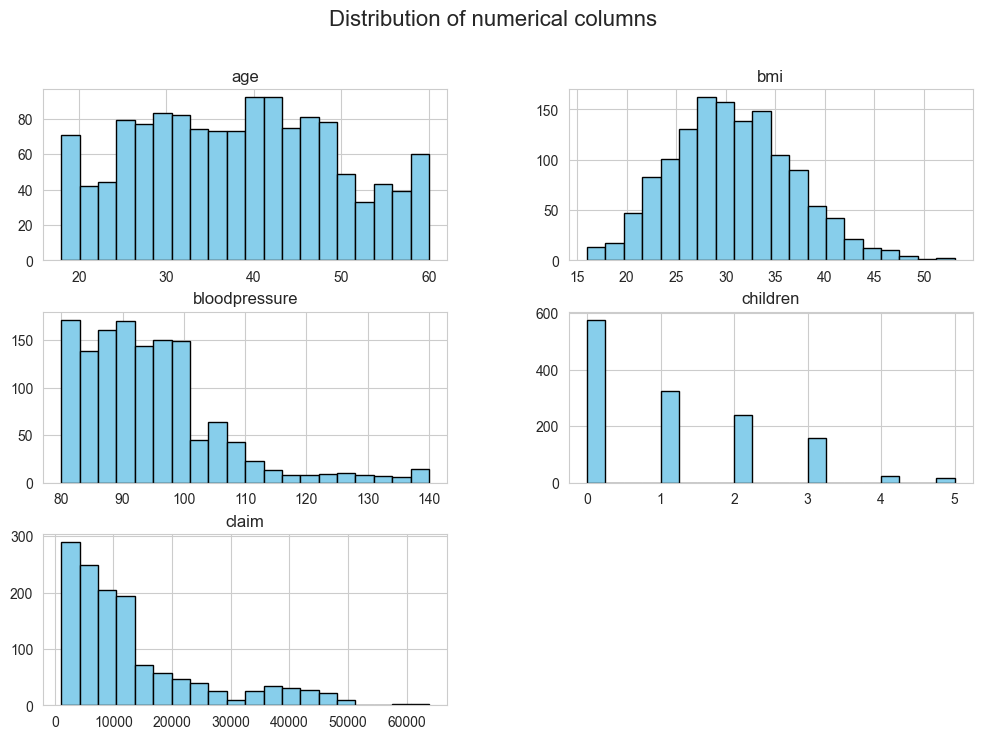

In [17]:
df[numerical_cols].hist(bins = 20, figsize=(12,8), color = "skyblue", edgecolor = "Black")
plt.suptitle("Distribution of numerical columns",fontsize = 16)
plt.show()

In [18]:
categorical_cols = df.select_dtypes(exclude=["int", "float"]).columns
categorical_cols

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')

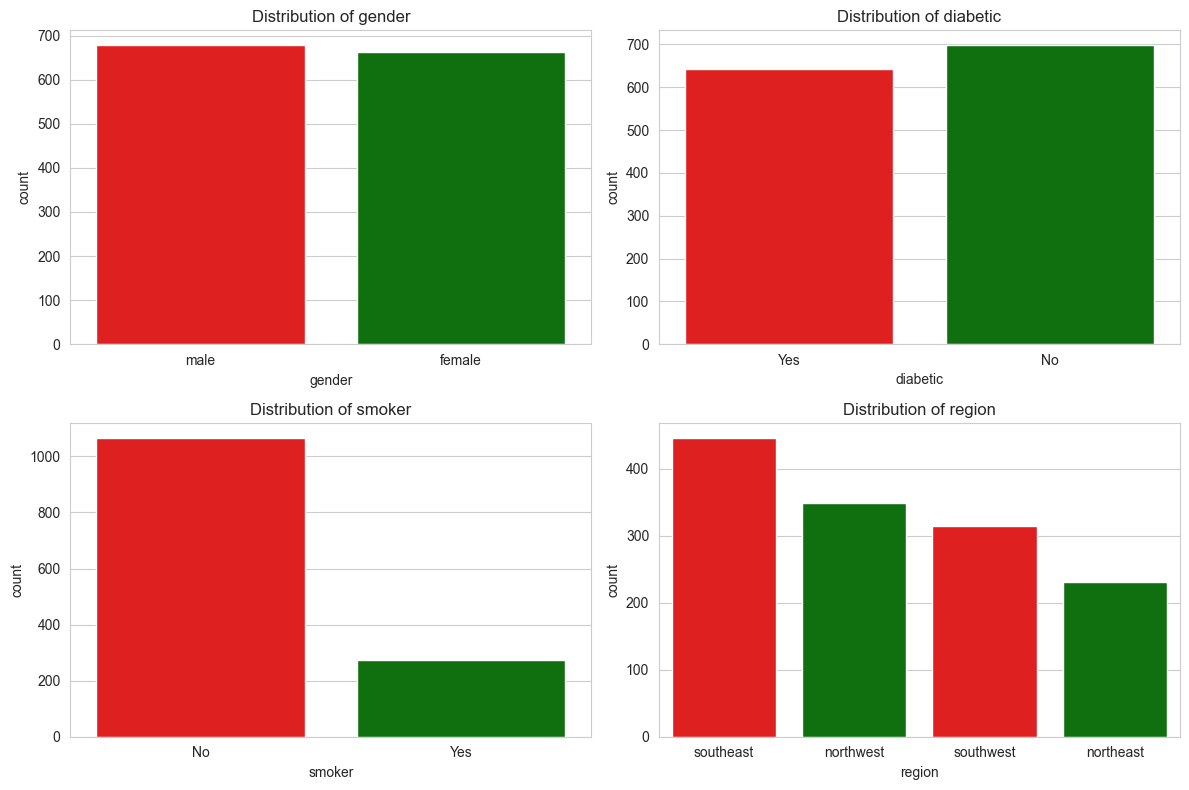

In [19]:
plt.figure(figsize=(12,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = df[col], palette=["red", "green"])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("Distribution of categorical columns")
plt.show()

In [20]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8061.54
        Yes      33042.01
Name: claim, dtype: float64

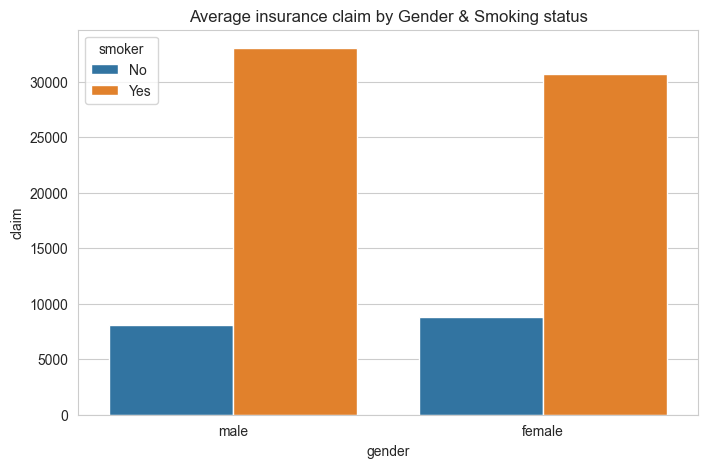

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x = "gender", y = "claim", hue = "smoker", estimator = "mean", errorbar="sd", ci = None)
plt.title("Average insurance claim by Gender & Smoking status")
plt.show()


In [22]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11335.48,12083.74
southeast,13524.18,12419.20
southwest,13069.91,12313.74


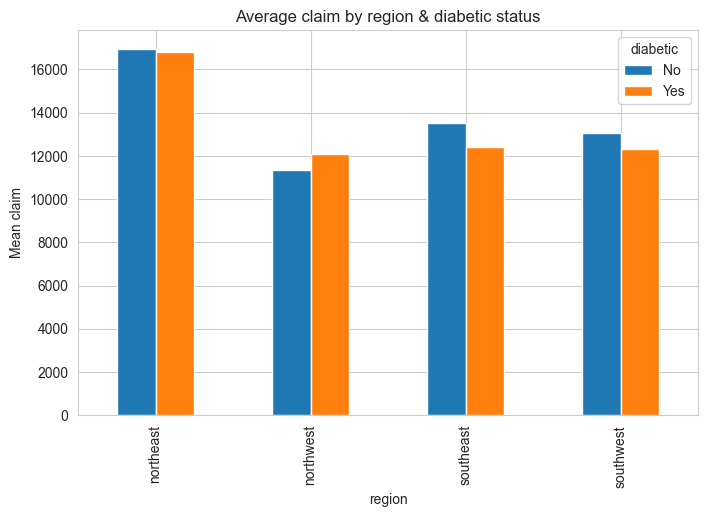

In [23]:
pivot_region_diabetic.plot(kind = "bar", figsize=(8,5))
plt.title("Average claim by region & diabetic status")
plt.ylabel("Mean claim")
plt.show()

In [24]:
pivot_table = pd.pivot_table(data = df, values="claim", index="region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,7980.83,30192.00
southeast,7374.07,34845.00
southwest,8294.75,32269.06


In [25]:
pd.pivot_table(df, values="claim", index = "children", columns="diabetic" ,aggfunc="mean")

diabetic,No,Yes
children,,
0,12846.24,11795.14
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


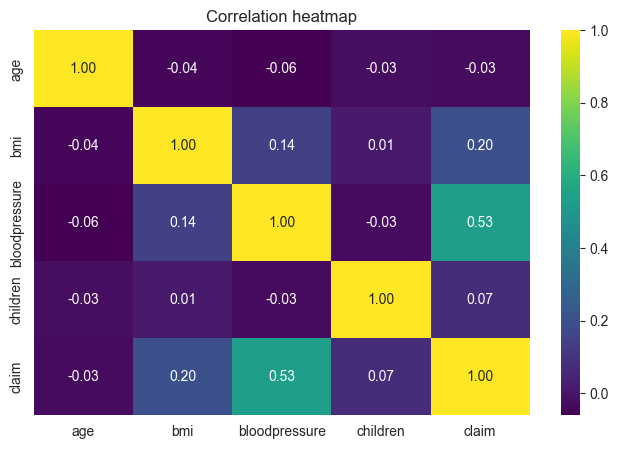

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(df[numerical_cols].corr(), annot = True, fmt = ".2f", cmap="viridis")
plt.title("Correlation heatmap")
plt.show()

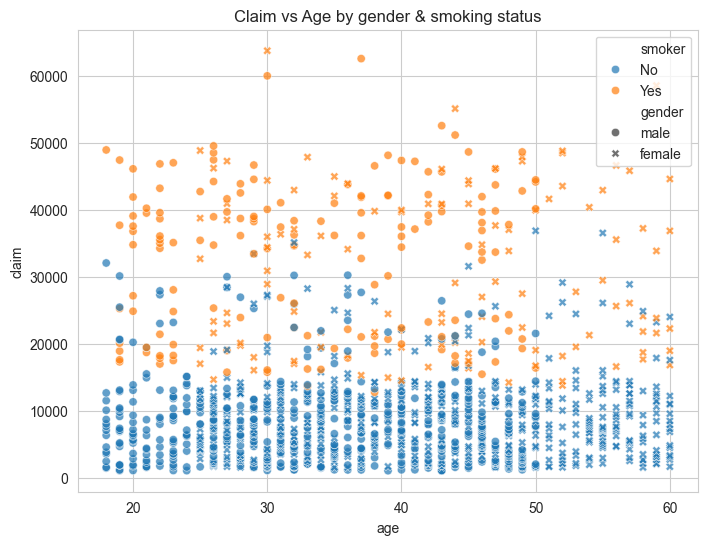

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style="gender", alpha = 0.7)
plt.title("Claim vs Age by gender & smoking status")
plt.show()

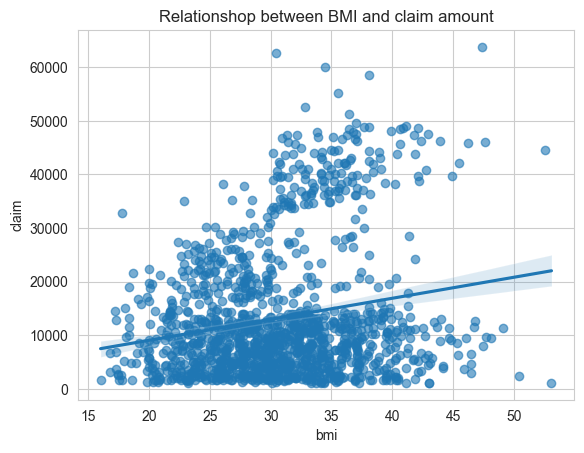

In [28]:
sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws= {"alpha" : 0.6})
plt.title("Relationshop between BMI and claim amount")
plt.show()

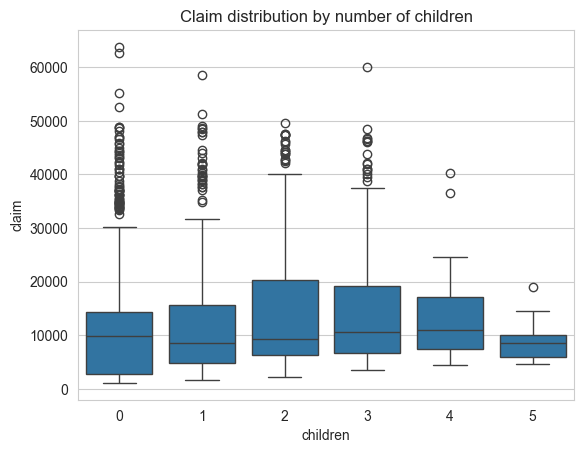

In [29]:
sns.boxplot(data = df, x = "children", y = "claim")
plt.title("Claim distribution by number of children")
plt.show()

In [30]:
df["age_group"] = pd.cut(df["age"], bins = [0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-68", "60+"])

In [31]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
2,3,43.00,male,33.30,82,Yes,0,No,southeast,1135.94,31-45
3,4,43.00,male,33.70,80,No,0,No,northwest,1136.40,31-45
4,5,43.00,male,34.10,100,No,0,No,northwest,1137.01,31-45


In [32]:
df['age_group'].value_counts()

age_group
31-45    561
46-68    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

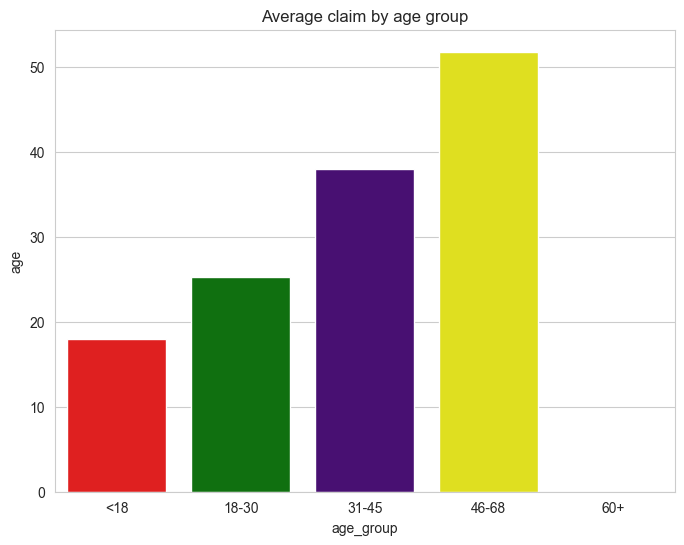

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(df, x = "age_group", y = "age", estimator="mean", ci = None, palette=["red", "green", "indigo", "yellow"])
plt.title("Average claim by age group")
plt.show()

In [34]:
df["bmi_category"] = pd.cut(df["bmi"], bins = [0, 18.5, 24.9, 29.9, 100], labels = ["Underweight", "Normal", "Overweight", "Obese"])

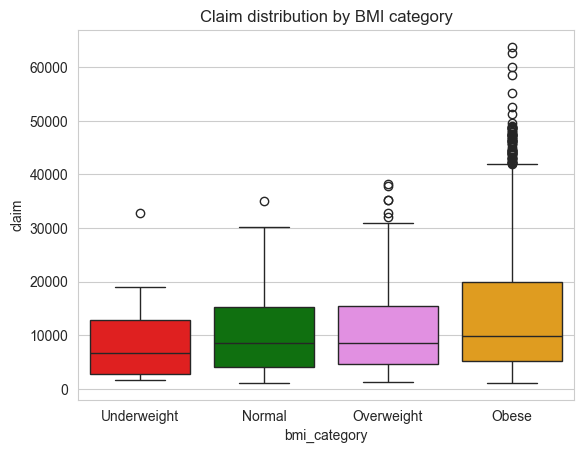

In [35]:
sns.boxplot(data = df, x = "bmi_category", y = "claim", palette=["red", "green", "violet", "orange"])
plt.title("Claim distribution by BMI category")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [37]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [38]:
X = df.drop(["claim", "age_group", "region", "bmi_category", "Id"], axis = 1)
Y = df["claim"]

In [39]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
2,43.00,male,33.30,82,Yes,0,No
3,43.00,male,33.70,80,No,0,No
4,43.00,male,34.10,100,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [40]:
cat_cols = X.select_dtypes(include="object")
label_encoders  ={}

In [41]:
encoder_dir = "encoders"
os.makedirs(encoder_dir, exist_ok=True)  
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    joblib.dump(le, os.path.join(encoder_dir, f"label_encoder_{col}.pkl"))

In [42]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
2,43.00,1,33.30,82,1,0,0
3,43.00,1,33.70,80,0,0,0
4,43.00,1,34.10,100,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [43]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape

((1072, 7), (268, 7))

In [45]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [46]:
X_train

,age,gender,bmi,bloodpressure,diabetic,children,smoker
1148,-0.57,1,-0.63,1.81,1,-0.07,1
807,1.15,0,-0.79,-0.97,1,-0.91,0
1287,-0.57,0,1.39,0.16,1,-0.91,1
590,-0.03,0,-1.17,0.16,1,1.59,0
1188,-0.12,1,-0.36,-0.54,0,1.59,1
...,...,...,...,...,...,...,...
1095,-0.03,0,-0.85,0.85,1,-0.07,1
1130,0.06,0,-0.48,0.85,1,-0.07,1
1294,-0.21,0,-0.05,3.12,0,-0.07,1
860,-0.12,0,0.47,-0.89,1,-0.91,0


In [47]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [49]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = root_mean_squared_error(Y_test, y_pred)
    return {"R2" : r2, "MAE" : mae, "RMSE" : rmse}

In [50]:
results = {}
lr = LinearRegression()
lr.fit(X_train, Y_train)
results["LinearRegression"] = evaluate_model(lr, X_train, X_test, Y_train, Y_test)
print("Linear Regression model trained.")

Linear Regression model trained.


In [51]:
best_poly_model = None
best_poly_score = -np.inf
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, Y_train)
    score = poly_lr.score(X_test_poly, Y_test)
    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

if best_poly_model is not None:
    degree, poly, poly_lr = best_poly_model
    results[f"polynomial model deg = {degree}"] = evaluate_model(
        poly_lr,
        poly.transform(X_train),
        poly.transform(X_test),
        Y_train,
        Y_test
    )
    print(f"Best polynomial model degree = {degree}")
else:
    print("No polynomial model was selected.")

Best polynomial model degree = 2


In [52]:
rf = RandomForestRegressor()
rf_params = {
    "n_estimators" : [100, 200],
    "max_depth" : [None, 10, 20],
    "min_samples_split" : [2,5],
    "min_samples_leaf" : [1,2]
}
rf_grid = GridSearchCV(rf, param_grid = rf_params, cv = 3, scoring = "r2", n_jobs = -1, verbose = 0)
rf_grid.fit(X_train, Y_train)
best_rf = rf_grid.best_estimator_
results["Random forest regressor"] = evaluate_model(best_rf, X_train, X_test, Y_train, Y_test)
print(f"Random forest model is trained. Best parameters: {rf_grid.best_params_}")

Random forest model is trained. Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [53]:
svr = SVR()
svr_params = {
    "kernel" : ["rbf", "linear", "poly"],
    "C" : [1, 10, 50],
    "epsilon" : [0.1, 0.2, 0.5],
    "degree" : [2,3]
}
svr_grid = GridSearchCV(svr, svr_params, cv = 3, scoring = "r2", n_jobs  = -1, verbose = 0)
svr_grid.fit(X_train, Y_train)
best_svr = svr_grid.best_estimator_
results["SVR"] = evaluate_model(best_svr, X_train, X_test, Y_train, Y_test)
print(f"Support vector regressor is trained. Best parameters: {svr_grid.best_params_}")

Support vector regressor is trained. Best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}


In [54]:
xgb = XGBRegressor(objective = "reg:squarederror")
xgb_params = {
    "n_estimators" : [100, 200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "subsample" : [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv = 3, scoring = "r2", n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, Y_train)
best_xgb = xgb_grid.best_estimator_
results["XGBRegressor"] = evaluate_model(best_xgb, X_train, X_test, Y_train, Y_test)
print(f"XGBoost regressor is trained. Best parameters: {xgb_grid.best_params_}")

XGBoost regressor is trained. Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [55]:
results_df = pd.DataFrame(results).T.sort_values(ascending = False, by = "R2")
results_df

,R2,MAE,RMSE
XGBRegressor,0.85,3745.94,4984.32
Random forest regressor,0.83,3926.02,5325.37
polynomial model deg = 2,0.80,4378.69,5746.78
LinearRegression,0.73,4990.12,6633.30
SVR,0.50,6135.77,9074.89


In [56]:
models = {
    "Linear Regression" : lr,
    "Polynomial regression" : poly_lr,
    "RandomForestRegressor" : best_rf,
    "SVR" : best_svr,
    "XGBRegressor" : best_xgb
}
models

{'Linear Regression': LinearRegression(),
 'Polynomial regression': LinearRegression(),
 'RandomForestRegressor': RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5),
 'SVR': SVR(C=50, degree=2, epsilon=0.5, kernel='linear'),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_p

In [57]:
best_r2 = results_df["R2"].max()
best_r2.round(3)

np.float64(0.849)

In [58]:
top_model = results_df[results_df["R2"] == best_r2]
top_model

,R2,MAE,RMSE
XGBRegressor,0.85,3745.94,4984.32


In [59]:
best_model = models[top_model.index[0]]
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [61]:
print("best model selected : ", top_model.index[0])

best model selected :  XGBRegressor
